In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


# del X_train,X_test

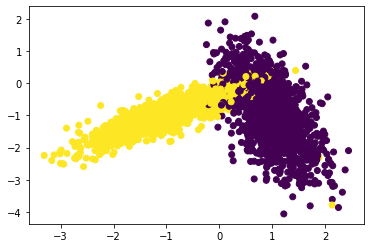

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [31]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params"
    train_accuracy_score = [] #final list that stores train data score
    test_accuracy_score = [] # final list to store cv data score
    
    
    params = random.sample(range(param_range[0],param_range[1]),10) #select 10 random values for the hyperparameter # of neighbors
    print("the params are ",params)
        
    

    

    for neighbor in tqdm(params):
        print("For the value of k ",neighbor)
        tr_sc ,test_score = get_k_fold_data(x_train,y_train,folds,classifier,neighbor) 
        train_accuracy_score.append(tr_sc) #list to store the train accuracy for a given value of k
        test_accuracy_score.append(test_score) #list to store the test accuracy for a given value of k
    
    print("the train acc is ",train_accuracy_score)
    print("test accuracy score is ",test_accuracy_score)
    print("*"*50)
    return params,train_accuracy_score,test_accuracy_score
        
        

In [4]:
def fit_data_to_model(train_data_X,train_data_y,test_data_X,test_data_y,classifier,n_neighbor):
    '''fits and predicts the given data based on hyper parameter and number of folds'''

    classifier.n_neighbors = n_neighbor

    classifier.fit(train_data_X,train_data_y)
    y_train_pred = classifier.predict(train_data_X)
    y_test_pred = classifier.predict(test_data_X)
    tr_score = accuracy_score(train_data_y,y_train_pred)
    test_score = accuracy_score(test_data_y,y_test_pred)
    return tr_score,test_score
    

In [5]:
def get_k_fold_data(X_train,y_train,folds,classifier,n_neighbor):
    '''divide the data into train and cv partitions based on the value of folds'''
    
    train_data_length = X_train.shape[0]
    datapoints_per_fold = train_data_length//folds #get the min number pf datapoints per fold
    fold_dict = dict.fromkeys(list(range(1,folds+1)),None) #create a dict to store per fold data
    fold_cnt  = 1 # var to keep track of the fold
    keys_set = set(fold_dict.keys())  
    print("keys set is ",keys_set)
    tr_score_list = []
    test_score_list = []
    
    
    #assign data to each fold
    #this includes both X and y compoenets
    for index in range(0,train_data_length,datapoints_per_fold):
        if fold_cnt == folds: #check for the last fold and take the whole data
            start_pos = index
            fold_dict[fold_cnt] = {'X':X_train[start_pos:],'y':y_train[start_pos:]}
        else:
            start_pos = index
            end_pos = index + datapoints_per_fold 
            fold_dict[fold_cnt] = {'X':X_train[start_pos:end_pos],'y':y_train[start_pos:end_pos]} #in every fold id store x and y data
        fold_cnt+=1
    
    for k in fold_dict.keys():
        test_set_key = set()
        test_set_key.add(k) #asssign the cv data fold
        train_set_keys = keys_set - test_set_key #apply the set diff operation , get reamining keys as train keys
        print("train keys are ",train_set_keys)
        print("test set keys are ",test_set_key)
        
        train_data_X = []
        train_data_y = []
        test_data_X = []
        test_data_y = []
        
        #collect the data across multiple fold and store them as train and test data
        
        for train_fold in train_set_keys:
            x_data = fold_dict[train_fold]['X']
            y_data = fold_dict[train_fold]['y']
           
            train_data_X.extend(x_data.tolist())
            train_data_y.extend(y_data.tolist())
            
        for test_fold in test_set_key:
            x_data = fold_dict[test_fold]['X']
            y_data = fold_dict[test_fold]['y']
            
            test_data_X.extend(x_data.tolist())
            test_data_y.extend(y_data.tolist())
        
        train_data_X = np.array(train_data_X)
        train_data_y = np.array(train_data_y)
        test_data_X = np.array(test_data_X)
        test_data_y = np.array(test_data_y)
        
        tr_score,test_score = fit_data_to_model(train_data_X,train_data_y,test_data_X,test_data_y,classifier,n_neighbor)
        tr_score_list.append(tr_score)
        test_score_list.append(test_score)
    
    #for a given value of hyperparamter, get accuracies across all folds and compute average
    final_train_score = sum(tr_score_list)/len(tr_score_list)
    final_test_score = sum(test_score_list)/len(test_score_list)
    return final_train_score,final_test_score
       
        
        
        


In [30]:
X_train[0]

array([ 0.45267141, -1.42381257])

In [32]:
#set all the inital parameters

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import random
import pandas as pd

knn = KNeighborsClassifier()
param_dict = (1,50)
folds = 10

In [33]:
n_neighbors,train_score,test_score = RandomSearchCV(X_train,y_train,knn,param_dict,folds)

score_df = pd.DataFrame({'No. of neighbors':n_neighbors,'Train score':train_score,'Test Score':test_score})

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

the params are  [6, 49, 20, 47, 5, 13, 1, 8, 29, 9]
For the value of k  6
keys set is  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
train keys are  {2, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {1}
train keys are  {1, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {2}
train keys are  {1, 2, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {3}
train keys are  {1, 2, 3, 5, 6, 7, 8, 9, 10}
test set keys are  {4}
train keys are  {1, 2, 3, 4, 6, 7, 8, 9, 10}
test set keys are  {5}
train keys are  {1, 2, 3, 4, 5, 7, 8, 9, 10}
test set keys are  {6}
train keys are  {1, 2, 3, 4, 5, 6, 8, 9, 10}
test set keys are  {7}
train keys are  {1, 2, 3, 4, 5, 6, 7, 9, 10}
test set keys are  {8}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 10}
test set keys are  {9}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 9}
test set keys are  {10}


 10%|████████▎                                                                          | 1/10 [00:02<00:21,  2.39s/it]

For the value of k  49
keys set is  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
train keys are  {2, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {1}
train keys are  {1, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {2}
train keys are  {1, 2, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {3}
train keys are  {1, 2, 3, 5, 6, 7, 8, 9, 10}
test set keys are  {4}
train keys are  {1, 2, 3, 4, 6, 7, 8, 9, 10}
test set keys are  {5}
train keys are  {1, 2, 3, 4, 5, 7, 8, 9, 10}
test set keys are  {6}
train keys are  {1, 2, 3, 4, 5, 6, 8, 9, 10}
test set keys are  {7}
train keys are  {1, 2, 3, 4, 5, 6, 7, 9, 10}
test set keys are  {8}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 10}
test set keys are  {9}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 9}
test set keys are  {10}


 20%|████████████████▌                                                                  | 2/10 [00:05<00:19,  2.50s/it]

For the value of k  20
keys set is  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
train keys are  {2, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {1}
train keys are  {1, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {2}
train keys are  {1, 2, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {3}
train keys are  {1, 2, 3, 5, 6, 7, 8, 9, 10}
test set keys are  {4}
train keys are  {1, 2, 3, 4, 6, 7, 8, 9, 10}
test set keys are  {5}
train keys are  {1, 2, 3, 4, 5, 7, 8, 9, 10}
test set keys are  {6}
train keys are  {1, 2, 3, 4, 5, 6, 8, 9, 10}
test set keys are  {7}
train keys are  {1, 2, 3, 4, 5, 6, 7, 9, 10}
test set keys are  {8}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 10}
test set keys are  {9}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 9}
test set keys are  {10}


 30%|████████████████████████▉                                                          | 3/10 [00:07<00:17,  2.46s/it]

For the value of k  47
keys set is  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
train keys are  {2, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {1}
train keys are  {1, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {2}
train keys are  {1, 2, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {3}
train keys are  {1, 2, 3, 5, 6, 7, 8, 9, 10}
test set keys are  {4}
train keys are  {1, 2, 3, 4, 6, 7, 8, 9, 10}
test set keys are  {5}
train keys are  {1, 2, 3, 4, 5, 7, 8, 9, 10}
test set keys are  {6}
train keys are  {1, 2, 3, 4, 5, 6, 8, 9, 10}
test set keys are  {7}
train keys are  {1, 2, 3, 4, 5, 6, 7, 9, 10}
test set keys are  {8}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 10}
test set keys are  {9}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 9}
test set keys are  {10}


 40%|█████████████████████████████████▏                                                 | 4/10 [00:10<00:15,  2.62s/it]

For the value of k  5
keys set is  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
train keys are  {2, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {1}
train keys are  {1, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {2}
train keys are  {1, 2, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {3}
train keys are  {1, 2, 3, 5, 6, 7, 8, 9, 10}
test set keys are  {4}
train keys are  {1, 2, 3, 4, 6, 7, 8, 9, 10}
test set keys are  {5}
train keys are  {1, 2, 3, 4, 5, 7, 8, 9, 10}
test set keys are  {6}
train keys are  {1, 2, 3, 4, 5, 6, 8, 9, 10}
test set keys are  {7}
train keys are  {1, 2, 3, 4, 5, 6, 7, 9, 10}
test set keys are  {8}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 10}
test set keys are  {9}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 9}
test set keys are  {10}


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:12<00:12,  2.50s/it]

For the value of k  13
keys set is  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
train keys are  {2, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {1}
train keys are  {1, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {2}
train keys are  {1, 2, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {3}
train keys are  {1, 2, 3, 5, 6, 7, 8, 9, 10}
test set keys are  {4}
train keys are  {1, 2, 3, 4, 6, 7, 8, 9, 10}
test set keys are  {5}
train keys are  {1, 2, 3, 4, 5, 7, 8, 9, 10}
test set keys are  {6}
train keys are  {1, 2, 3, 4, 5, 6, 8, 9, 10}
test set keys are  {7}
train keys are  {1, 2, 3, 4, 5, 6, 7, 9, 10}
test set keys are  {8}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 10}
test set keys are  {9}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 9}
test set keys are  {10}


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:15<00:09,  2.45s/it]

For the value of k  1
keys set is  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
train keys are  {2, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {1}
train keys are  {1, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {2}
train keys are  {1, 2, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {3}
train keys are  {1, 2, 3, 5, 6, 7, 8, 9, 10}
test set keys are  {4}
train keys are  {1, 2, 3, 4, 6, 7, 8, 9, 10}
test set keys are  {5}
train keys are  {1, 2, 3, 4, 5, 7, 8, 9, 10}
test set keys are  {6}
train keys are  {1, 2, 3, 4, 5, 6, 8, 9, 10}
test set keys are  {7}
train keys are  {1, 2, 3, 4, 5, 6, 7, 9, 10}
test set keys are  {8}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 10}
test set keys are  {9}


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:17<00:07,  2.33s/it]

train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 9}
test set keys are  {10}
For the value of k  8
keys set is  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
train keys are  {2, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {1}
train keys are  {1, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {2}
train keys are  {1, 2, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {3}
train keys are  {1, 2, 3, 5, 6, 7, 8, 9, 10}
test set keys are  {4}
train keys are  {1, 2, 3, 4, 6, 7, 8, 9, 10}
test set keys are  {5}
train keys are  {1, 2, 3, 4, 5, 7, 8, 9, 10}
test set keys are  {6}
train keys are  {1, 2, 3, 4, 5, 6, 8, 9, 10}
test set keys are  {7}
train keys are  {1, 2, 3, 4, 5, 6, 7, 9, 10}
test set keys are  {8}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 10}
test set keys are  {9}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 9}
test set keys are  {10}


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:19<00:04,  2.37s/it]

For the value of k  29
keys set is  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
train keys are  {2, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {1}
train keys are  {1, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {2}
train keys are  {1, 2, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {3}
train keys are  {1, 2, 3, 5, 6, 7, 8, 9, 10}
test set keys are  {4}
train keys are  {1, 2, 3, 4, 6, 7, 8, 9, 10}
test set keys are  {5}
train keys are  {1, 2, 3, 4, 5, 7, 8, 9, 10}
test set keys are  {6}
train keys are  {1, 2, 3, 4, 5, 6, 8, 9, 10}
test set keys are  {7}
train keys are  {1, 2, 3, 4, 5, 6, 7, 9, 10}
test set keys are  {8}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 10}
test set keys are  {9}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 9}
test set keys are  {10}


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:22<00:02,  2.40s/it]

For the value of k  9
keys set is  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
train keys are  {2, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {1}
train keys are  {1, 3, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {2}
train keys are  {1, 2, 4, 5, 6, 7, 8, 9, 10}
test set keys are  {3}
train keys are  {1, 2, 3, 5, 6, 7, 8, 9, 10}
test set keys are  {4}
train keys are  {1, 2, 3, 4, 6, 7, 8, 9, 10}
test set keys are  {5}
train keys are  {1, 2, 3, 4, 5, 7, 8, 9, 10}
test set keys are  {6}
train keys are  {1, 2, 3, 4, 5, 6, 8, 9, 10}
test set keys are  {7}
train keys are  {1, 2, 3, 4, 5, 6, 7, 9, 10}
test set keys are  {8}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 10}
test set keys are  {9}
train keys are  {1, 2, 3, 4, 5, 6, 7, 8, 9}
test set keys are  {10}


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.43s/it]

the train acc is  [0.9603999999999999, 0.9576148148148148, 0.9575703703703704, 0.9574814814814815, 0.9621925925925929, 0.9581037037037035, 1.0, 0.959362962962963, 0.956548148148148, 0.96]
test accuracy score is  [0.9529333333333334, 0.9559999999999998, 0.9551999999999999, 0.9566666666666667, 0.9511999999999998, 0.9547999999999999, 0.9345333333333332, 0.9542666666666667, 0.9551999999999998, 0.9540000000000001]
**************************************************


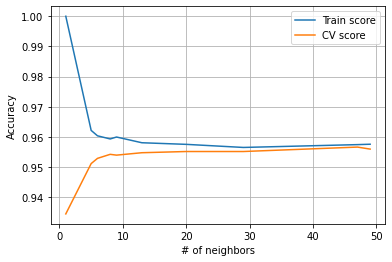

In [34]:
import matplotlib.pyplot as plt
score_df.sort_values(by = 'No. of neighbors',inplace=True)


plt.plot(score_df['No. of neighbors'],score_df['Train score'],label = 'Train score')
plt.plot(score_df['No. of neighbors'],score_df['Test Score'],label = 'CV score')
plt.legend(loc = 'upper right')
plt.xlabel("# of neighbors")
plt.ylabel("Accuracy")
plt.grid(axis = 'y')
plt.grid(axis = 'x')
plt.show()

In [35]:
score_df

,No. of neighbors,Train score,Test Score
6,1,1.000000,0.934533
4,5,0.962193,0.951200
0,6,0.960400,0.952933
7,8,0.959363,0.954267
9,9,0.960000,0.954000
5,13,0.958104,0.954800
2,20,0.957570,0.955200
8,29,0.956548,0.955200
3,47,0.957481,0.956667
1,49,0.957615,0.956000


In [36]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
y_test_pred = knn.predict(X_test)
print("the test accuracy score is ",accuracy_score(y_test,y_test_pred))

the test accuracy score is  0.9672


In [28]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

<ipython-input-28-50bec3a546e3>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


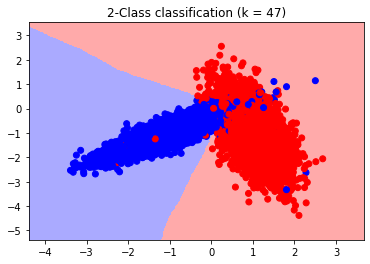

In [39]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 47)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

#Checking the accuracy using builtins

In [38]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params = {'n_neighbors':[6, 49, 20, 47, 5, 13, 1, 8, 29, 9]}
grid_search = GridSearchCV(knn,param_grid = params,scoring = 'accuracy',cv = 10,verbose = 5)
grid_search.fit(X_train,y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("Best estimator " ,grid_search.best_estimator_)
print("Best param is ",grid_search.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_neighbors=6 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... n_neighbors=6, score=0.943, total=   0.1s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.944, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.960, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.949, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.963, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.967, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.943, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .

[CV] ...................... n_neighbors=13, score=0.956, total=   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ...................... n_neighbors=13, score=0.955, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.924, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.919, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.948, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.932, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.944, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished


Best estimator  KNeighborsClassifier(n_neighbors=47)
Best param is  {'n_neighbors': 47}


In [42]:
pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score']]

,params,mean_test_score
0,{'n_neighbors': 6},0.952533
1,{'n_neighbors': 49},0.956267
2,{'n_neighbors': 20},0.955200
3,{'n_neighbors': 47},0.956533
4,{'n_neighbors': 5},0.950933
5,{'n_neighbors': 13},0.954933
6,{'n_neighbors': 1},0.934533
7,{'n_neighbors': 8},0.954000
8,{'n_neighbors': 29},0.955333
9,{'n_neighbors': 9},0.953467
